<a href="https://colab.research.google.com/github/iamjatinjain/CIS-9665-Natural-Langauge-Processing/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
reviews_dataset = pd.read_csv("/content/drive/MyDrive/CIS NLP Datasets/reviews.csv")
reviews_dataset



,asin,name,rating,date,verified,title,body,helpfulVotes
0,B0000SX2UC,Janet,3,"October 11, 2005",False,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,1.0
1,B0000SX2UC,Luke Wyatt,1,"January 7, 2004",False,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,17.0
2,B0000SX2UC,Brooke,5,"December 30, 2003",False,Love This Phone,"This is a great, reliable phone. I also purcha...",5.0
3,B0000SX2UC,amy m. teague,3,"March 18, 2004",False,"Love the Phone, BUT...!","I love the phone and all, because I really did...",1.0
4,B0000SX2UC,tristazbimmer,4,"August 28, 2005",False,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,1.0
...,...,...,...,...,...,...,...,...
67981,B081H6STQQ,jande,5,"August 16, 2019",False,"Awesome Phone, but finger scanner is a big mis...",I love the camera on this phone. The screen is...,1.0
67982,B081H6STQQ,2cool4u,5,"September 14, 2019",False,Simply Amazing!,I've been an Xperia user for several years and...,1.0
67983,B081H6STQQ,simon,5,"July 14, 2019",False,"great phon3, but many bugs need to fix. still ...",buy one more for my cousin,NaN
67984,B081TJFVCJ,Tobiasz Jedrysiak,5,"December 24, 2019",True,Phone is like new,Product looks and works like new. Very much re...,NaN


In [4]:
reviews_dataset.shape

#number of unique reviews
print("Unique Reviews", len(pd.unique(reviews_dataset['body'])))

Unique Reviews 59812


In [5]:
items_dataset = pd.read_csv("/content/drive/MyDrive/CIS NLP Datasets/items.csv")
items_dataset

,asin,brand,title,url,image,rating,reviewUrl,totalReviews,price,originalPrice
0,B0000SX2UC,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.00,0.00
1,B0009N5L7K,Motorola,Motorola I265 phone,https://www.amazon.com/Motorola-i265-I265-phon...,https://m.media-amazon.com/images/I/419WBAVDAR...,3.0,https://www.amazon.com/product-reviews/B0009N5L7K,7,49.95,0.00
2,B000SKTZ0S,Motorola,MOTOROLA C168i AT&T CINGULAR PREPAID GOPHONE C...,https://www.amazon.com/MOTOROLA-C168i-CINGULAR...,https://m.media-amazon.com/images/I/71b+q3ydkI...,2.7,https://www.amazon.com/product-reviews/B000SKTZ0S,22,99.99,0.00
3,B001AO4OUC,Motorola,Motorola i335 Cell Phone Boost Mobile,https://www.amazon.com/Motorola-i335-Phone-Boo...,https://m.media-amazon.com/images/I/710UO8gdT+...,3.3,https://www.amazon.com/product-reviews/B001AO4OUC,21,0.00,0.00
4,B001DCJAJG,Motorola,Motorola V365 no contract cellular phone AT&T,https://www.amazon.com/Motorola-V365-contract-...,https://m.media-amazon.com/images/I/61LYNCVrrK...,3.1,https://www.amazon.com/product-reviews/B001DCJAJG,12,149.99,0.00
...,...,...,...,...,...,...,...,...,...,...
715,B07ZPKZSSC,Apple,"Apple iPhone 11 Pro, 64GB, Fully Unlocked - Sp...",https://www.amazon.com/Apple-iPhone-64GB-Fully...,https://m.media-amazon.com/images/I/41wDuEW9iZ...,1.0,https://www.amazon.com/product-reviews/B07ZPKZSSC,1,949.00,0.00
716,B07ZQSGP53,Xiaomi,"Xiaomi Redmi Note 8, 32GB/3GB RAM 6.3"" FHD+ Di...",https://www.amazon.com/Xiaomi-Display-Snapdrag...,https://m.media-amazon.com/images/I/41foh4FKHE...,4.6,https://www.amazon.com/product-reviews/B07ZQSGP53,3,150.96,0.00
717,B081H6STQQ,Sony,Sony Xperia 1 Unlocked Smartphone and WH1000XM...,https://www.amazon.com/Sony-Smartphone-WH1000X...,https://m.media-amazon.com/images/I/51zZTAXZTP...,4.5,https://www.amazon.com/product-reviews/B081H6STQQ,70,948.00,0.00
718,B081TJFVCJ,Apple,"Apple iPhone X, 64GB, Gray - Fully Unlocked (R...",https://www.amazon.com/Apple-iPhone-64GB-Gray-...,https://m.media-amazon.com/images/I/71yMgOenT5...,5.0,https://www.amazon.com/product-reviews/B081TJFVCJ,1,478.97,0.00


In [6]:
items_dataset.shape

(720, 10)

In [7]:
reviews_dataset.describe()

,rating,helpfulVotes
count,67986.000000,27215.000000
mean,3.807916,8.229690
std,1.582906,31.954877
min,1.000000,1.000000
25%,3.000000,1.000000
50%,5.000000,2.000000
75%,5.000000,5.000000
max,5.000000,990.000000


In [8]:
reviews_dataset.describe

<bound method NDFrame.describe of              asin               name  rating                date  verified  \
0      B0000SX2UC              Janet       3    October 11, 2005     False   
1      B0000SX2UC         Luke Wyatt       1     January 7, 2004     False   
2      B0000SX2UC             Brooke       5   December 30, 2003     False   
3      B0000SX2UC      amy m. teague       3      March 18, 2004     False   
4      B0000SX2UC      tristazbimmer       4     August 28, 2005     False   
...           ...                ...     ...                 ...       ...   
67981  B081H6STQQ              jande       5     August 16, 2019     False   
67982  B081H6STQQ            2cool4u       5  September 14, 2019     False   
67983  B081H6STQQ              simon       5       July 14, 2019     False   
67984  B081TJFVCJ  Tobiasz Jedrysiak       5   December 24, 2019      True   
67985  B0825BB7SG      Owen Gonzalez       5   December 11, 2019     False   

                             

# **Text Pre-processing**

In [9]:
#evaluate columns
print('Reviews Dataset Column Names', reviews_dataset.columns.values)
print('Items Dataset Column Names', items_dataset.columns.values)

Reviews Dataset Column Names ['asin' 'name' 'rating' 'date' 'verified' 'title' 'body' 'helpfulVotes']
Items Dataset Column Names ['asin' 'brand' 'title' 'url' 'image' 'rating' 'reviewUrl' 'totalReviews'
 'price' 'originalPrice']


In [10]:
#renaming columns so naming conventions are more intuitive and do not confuse labels before merging
reviews_dataset= reviews_dataset.rename(columns={'title': 'review_title', 'body': 'review_body', 'rating': 'review_rating'})
items_dataset= items_dataset.rename(columns={'rating': 'average_product_review','title': 'phone_brand_model'})

In [11]:
#evaluate renamed columns
print('Reviews Dataset Column Names', reviews_dataset.columns.values)
print('Items Dataset Column Names', items_dataset.columns.values)

Reviews Dataset Column Names ['asin' 'name' 'review_rating' 'date' 'verified' 'review_title'
 'review_body' 'helpfulVotes']
Items Dataset Column Names ['asin' 'brand' 'phone_brand_model' 'url' 'image' 'average_product_review'
 'reviewUrl' 'totalReviews' 'price' 'originalPrice']


In [12]:
# Drop un-used columns
reviews_dataset=reviews_dataset.drop(columns=["name","helpfulVotes"])

items_dataset=items_dataset.drop(columns=["url","image","reviewUrl","originalPrice","totalReviews"])

In [13]:
# Drop null values
items_dataset=items_dataset.dropna()
items_dataset.shape

(716, 5)

In [14]:
reviews_dataset=reviews_dataset.dropna()
reviews_dataset.shape

(67956, 6)

In [15]:
#Column "ASIN" can be the link or primary key between two tables when merging dataset
phone_reviews = pd.merge(reviews_dataset, items_dataset, on="asin")

In [16]:
#change date to numerical format
phone_reviews['date'] = pd.to_datetime(phone_reviews['date'])

In [17]:
phone_reviews

,asin,review_rating,date,verified,review_title,review_body,brand,phone_brand_model,average_product_review,price
0,B0009N5L7K,1,2016-03-05,True,Stupid phone,DON'T BUY OUT OF SERVICE,Motorola,Motorola I265 phone,3.0,49.95
1,B0009N5L7K,4,2006-02-09,False,Exellent Service,I have been with nextel for nearly a year now ...,Motorola,Motorola I265 phone,3.0,49.95
2,B0009N5L7K,5,2006-02-07,False,I love it,"I just got it and have to say its easy to use,...",Motorola,Motorola I265 phone,3.0,49.95
3,B0009N5L7K,1,2016-12-20,True,Phones locked,1 star because the phones locked so I have to ...,Motorola,Motorola I265 phone,3.0,49.95
4,B0009N5L7K,5,2009-12-13,True,Excellent product,The product has been very good. I had used thi...,Motorola,Motorola I265 phone,3.0,49.95
...,...,...,...,...,...,...,...,...,...,...
67751,B081H6STQQ,5,2019-08-16,False,"Awesome Phone, but finger scanner is a big mis...",I love the camera on this phone. The screen is...,Sony,Sony Xperia 1 Unlocked Smartphone and WH1000XM...,4.5,948.00
67752,B081H6STQQ,5,2019-09-14,False,Simply Amazing!,I've been an Xperia user for several years and...,Sony,Sony Xperia 1 Unlocked Smartphone and WH1000XM...,4.5,948.00
67753,B081H6STQQ,5,2019-07-14,False,"great phon3, but many bugs need to fix. still ...",buy one more for my cousin,Sony,Sony Xperia 1 Unlocked Smartphone and WH1000XM...,4.5,948.00
67754,B081TJFVCJ,5,2019-12-24,True,Phone is like new,Product looks and works like new. Very much re...,Apple,"Apple iPhone X, 64GB, Gray - Fully Unlocked (R...",5.0,478.97


We decided to have two versions pre-processing to compare our results and see which options we may prefer with our analysis

In [18]:
#phone_reviews dataset will be used for option 1
#cell_reviews will be used for option 2
cell_reviews=phone_reviews

# **Option 1 - Cleanup using gensim for Tokenization, removal of stopwords, lemmatization**

In [19]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')
from nltk.corpus import wordnet
nltk.download('averaged_perceptron_tagger')

def lemmatize_text(text):
  return WordNetLemmatizer().lemmatize(text, pos='v')

def preprocess(text):
    result = []

    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_text(token))
    return result

phone_reviews['clean_review_title'] = phone_reviews['review_title'].map(preprocess)
phone_reviews['clean_review_body'] = phone_reviews['review_body'].map(preprocess)
phone_reviews.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


,asin,review_rating,date,verified,review_title,review_body,brand,phone_brand_model,average_product_review,price,clean_review_title,clean_review_body
0,B0009N5L7K,1,2016-03-05,True,Stupid phone,DON'T BUY OUT OF SERVICE,Motorola,Motorola I265 phone,3.0,49.95,"[stupid, phone]",[service]
1,B0009N5L7K,4,2006-02-09,False,Exellent Service,I have been with nextel for nearly a year now ...,Motorola,Motorola I265 phone,3.0,49.95,"[exellent, service]","[nextel, nearly, year, start, time, year, moto..."
2,B0009N5L7K,5,2006-02-07,False,I love it,"I just got it and have to say its easy to use,...",Motorola,Motorola I265 phone,3.0,49.95,[love],"[easy, hear, person, talk, fine, problems, dea..."
3,B0009N5L7K,1,2016-12-20,True,Phones locked,1 star because the phones locked so I have to ...,Motorola,Motorola I265 phone,3.0,49.95,"[phone, lock]","[star, phone, lock, additional, fee, unlock]"
4,B0009N5L7K,5,2009-12-13,True,Excellent product,The product has been very good. I had used thi...,Motorola,Motorola I265 phone,3.0,49.95,"[excellent, product]","[product, good, cell, phone, project, work, wo..."


# **Option 2 - regex**

In [20]:
# Go through pre-processing steps such as removing stop-words, punctuations, unnecessary words, and applying lower-case). It is optional to apply normlization such as stemming or lemmatization.
#removing all special characters 
import regex as re
def cleaning(text):
    text = re.sub('[^A-Za-z]+', ' ', text)
    return text
cell_reviews['clean_review_title'] = cell_reviews['review_title'].apply(cleaning)
cell_reviews['clean_review_body'] = cell_reviews['review_body'].apply(cleaning)

#applying lower-case function 
cell_reviews['clean_review_title'] = cell_reviews['clean_review_title'].str.lower()
cell_reviews['clean_review_body'] = cell_reviews['clean_review_body'].str.lower()
cell_reviews.head()

,asin,review_rating,date,verified,review_title,review_body,brand,phone_brand_model,average_product_review,price,clean_review_title,clean_review_body
0,B0009N5L7K,1,2016-03-05,True,Stupid phone,DON'T BUY OUT OF SERVICE,Motorola,Motorola I265 phone,3.0,49.95,stupid phone,don t buy out of service
1,B0009N5L7K,4,2006-02-09,False,Exellent Service,I have been with nextel for nearly a year now ...,Motorola,Motorola I265 phone,3.0,49.95,exellent service,i have been with nextel for nearly a year now ...
2,B0009N5L7K,5,2006-02-07,False,I love it,"I just got it and have to say its easy to use,...",Motorola,Motorola I265 phone,3.0,49.95,i love it,i just got it and have to say its easy to use ...
3,B0009N5L7K,1,2016-12-20,True,Phones locked,1 star because the phones locked so I have to ...,Motorola,Motorola I265 phone,3.0,49.95,phones locked,star because the phones locked so i have to p...
4,B0009N5L7K,5,2009-12-13,True,Excellent product,The product has been very good. I had used thi...,Motorola,Motorola I265 phone,3.0,49.95,excellent product,the product has been very good i had used this...


In [21]:
# word tokenizer using regexptokenizer 
from nltk.tokenize import regexp_tokenize
from nltk import RegexpTokenizer
tokenizer_re=RegexpTokenizer("[\w]+")

cell_reviews['clean_review_title'] = cell_reviews['clean_review_title'].map(tokenizer_re.tokenize)
cell_reviews['clean_review_body'] = cell_reviews['clean_review_body'].map(tokenizer_re.tokenize)
cell_reviews.head()

,asin,review_rating,date,verified,review_title,review_body,brand,phone_brand_model,average_product_review,price,clean_review_title,clean_review_body
0,B0009N5L7K,1,2016-03-05,True,Stupid phone,DON'T BUY OUT OF SERVICE,Motorola,Motorola I265 phone,3.0,49.95,"[stupid, phone]","[don, t, buy, out, of, service]"
1,B0009N5L7K,4,2006-02-09,False,Exellent Service,I have been with nextel for nearly a year now ...,Motorola,Motorola I265 phone,3.0,49.95,"[exellent, service]","[i, have, been, with, nextel, for, nearly, a, ..."
2,B0009N5L7K,5,2006-02-07,False,I love it,"I just got it and have to say its easy to use,...",Motorola,Motorola I265 phone,3.0,49.95,"[i, love, it]","[i, just, got, it, and, have, to, say, its, ea..."
3,B0009N5L7K,1,2016-12-20,True,Phones locked,1 star because the phones locked so I have to ...,Motorola,Motorola I265 phone,3.0,49.95,"[phones, locked]","[star, because, the, phones, locked, so, i, ha..."
4,B0009N5L7K,5,2009-12-13,True,Excellent product,The product has been very good. I had used thi...,Motorola,Motorola I265 phone,3.0,49.95,"[excellent, product]","[the, product, has, been, very, good, i, had, ..."


In [22]:
#remove stop words and words that are shorter than 2 letters
#import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk_stop_words=stopwords.words('english')
cell_reviews['clean_review_body'] = cell_reviews['clean_review_body'].apply(lambda words: [word for word in words if word not in nltk_stop_words and len(word)>2])
cell_reviews['clean_review_title'] = cell_reviews['clean_review_title'].apply(lambda words: [word for word in words if word not in nltk_stop_words and len(word)>2])
cell_reviews.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,asin,review_rating,date,verified,review_title,review_body,brand,phone_brand_model,average_product_review,price,clean_review_title,clean_review_body
0,B0009N5L7K,1,2016-03-05,True,Stupid phone,DON'T BUY OUT OF SERVICE,Motorola,Motorola I265 phone,3.0,49.95,"[stupid, phone]","[buy, service]"
1,B0009N5L7K,4,2006-02-09,False,Exellent Service,I have been with nextel for nearly a year now ...,Motorola,Motorola I265 phone,3.0,49.95,"[exellent, service]","[nextel, nearly, year, started, time, last, ye..."
2,B0009N5L7K,5,2006-02-07,False,I love it,"I just got it and have to say its easy to use,...",Motorola,Motorola I265 phone,3.0,49.95,[love],"[got, say, easy, use, hear, person, talking, f..."
3,B0009N5L7K,1,2016-12-20,True,Phones locked,1 star because the phones locked so I have to ...,Motorola,Motorola I265 phone,3.0,49.95,"[phones, locked]","[star, phones, locked, pay, additional, fees, ..."
4,B0009N5L7K,5,2009-12-13,True,Excellent product,The product has been very good. I had used thi...,Motorola,Motorola I265 phone,3.0,49.95,"[excellent, product]","[product, good, used, cell, phone, one, projec..."


In [23]:
#Add words together to create string
cell_reviews['clean_review_body'] = cell_reviews['clean_review_body'].apply(lambda x: (' '.join(x)))
cell_reviews['clean_review_title'] = cell_reviews['clean_review_title'].apply(lambda x: (' '.join(x)))
cell_reviews.head()

,asin,review_rating,date,verified,review_title,review_body,brand,phone_brand_model,average_product_review,price,clean_review_title,clean_review_body
0,B0009N5L7K,1,2016-03-05,True,Stupid phone,DON'T BUY OUT OF SERVICE,Motorola,Motorola I265 phone,3.0,49.95,stupid phone,buy service
1,B0009N5L7K,4,2006-02-09,False,Exellent Service,I have been with nextel for nearly a year now ...,Motorola,Motorola I265 phone,3.0,49.95,exellent service,nextel nearly year started time last year moto...
2,B0009N5L7K,5,2006-02-07,False,I love it,"I just got it and have to say its easy to use,...",Motorola,Motorola I265 phone,3.0,49.95,love,got say easy use hear person talking fine prob...
3,B0009N5L7K,1,2016-12-20,True,Phones locked,1 star because the phones locked so I have to ...,Motorola,Motorola I265 phone,3.0,49.95,phones locked,star phones locked pay additional fees unlock
4,B0009N5L7K,5,2009-12-13,True,Excellent product,The product has been very good. I had used thi...,Motorola,Motorola I265 phone,3.0,49.95,excellent product,product good used cell phone one projects work...


# **Sentiment Analysis**

In [24]:
#option 1
 #sentiment analysis set to sa variable
sa= phone_reviews[['clean_review_title','clean_review_body','review_rating']]
 
 #rename the columns
sa_reviews = sa.rename(columns={'clean_review_title':'title','clean_review_body':'body','review_rating':'label_num'})
sa_reviews.head()

,title,body,label_num
0,stupid phone,buy service,1
1,exellent service,nextel nearly year started time last year moto...,4
2,love,got say easy use hear person talking fine prob...,5
3,phones locked,star phones locked pay additional fees unlock,1
4,excellent product,product good used cell phone one projects work...,5


In [25]:
 #Option 2 
 #sentiment analysis set to sa variable
 cell_sa= phone_reviews[['clean_review_title','clean_review_body','review_rating']]
 
 #rename the columns
cell_sa_reviews = sa.rename(columns={'clean_review_title':'title','clean_review_body':'body','review_rating':'label_num'})
cell_sa_reviews.head()

,title,body,label_num
0,stupid phone,buy service,1
1,exellent service,nextel nearly year started time last year moto...,4
2,love,got say easy use hear person talking fine prob...,5
3,phones locked,star phones locked pay additional fees unlock,1
4,excellent product,product good used cell phone one projects work...,5


In [34]:
#option 1
#adding sentiment label
categories = sa_reviews['label_num']
labels = list(set(categories))
print('Possible categories', labels)

count = sa_reviews['label_num'].value_counts()
print(count)

Possible categories [1, 2, 3, 4, 5]
5    37630
1    12708
4     8786
3     4738
2     3894
Name: label_num, dtype: int64


In [35]:
#option 2
#adding sentiment label
categories = cell_sa_reviews['label_num']
labels = list(set(categories))
print('Possible categories', labels)

count = cell_sa_reviews['label_num'].value_counts()
print(count)

Possible categories [1, 2, 3, 4, 5]
5    37630
1    12708
4     8786
3     4738
2     3894
Name: label_num, dtype: int64


Sentiment Analysis: Data Processing

In [36]:
#option 1 determine sentiment label 3 or below is 'Not recommended' and 4 or 5 is recommended
sa_reviews['sentiment'] = sa_reviews.label_num.map({1:'Not Recommended',2:'Not Recommended', 3:'Not Recommended', 4:'Recommended', 5:'Recommended'})
print("Shape:", sa_reviews.shape)
print('Column names', sa_reviews.columns.values)
sa_reviews.iloc[:10,:]

Shape: (67756, 5)
Column names ['title' 'body' 'label_num' 'sentiment' 'new_label_num']


,title,body,label_num,sentiment,new_label_num
0,stupid phone,buy service,1,Not Recommended,0
1,exellent service,nextel nearly year started time last year moto...,4,Recommended,0
2,love,got say easy use hear person talking fine prob...,5,Recommended,0
3,phones locked,star phones locked pay additional fees unlock,1,Not Recommended,0
4,excellent product,product good used cell phone one projects work...,5,Recommended,0
5,warning,problems nextel stop canceled service get prob...,1,Not Recommended,0
6,nextel boost phone,great product great nextel boost insert sim,5,Recommended,0
7,nice,bought phone replace phone like expected put o...,4,Recommended,0
8,seems work existing sim card,purchased phone phone replacement even though ...,1,Not Recommended,0
9,supply needed,phone come charger sims card,1,Not Recommended,0


In [37]:
#option 2 determine sentiment label 3 or below is 'Not recommended' and 4 or 5 is recommended
sa_reviews['sentiment'] = sa_reviews.label_num.map({1:'Not Recommended',2:'Not Recommended', 3:'Not Recommended', 4:'Recommended', 5:'Recommended'})
print("Shape:", sa_reviews.shape)
print('Column names', sa_reviews.columns.values)
sa_reviews.iloc[:10,:]

Shape: (67756, 5)
Column names ['title' 'body' 'label_num' 'sentiment' 'new_label_num']


,title,body,label_num,sentiment,new_label_num
0,stupid phone,buy service,1,Not Recommended,0
1,exellent service,nextel nearly year started time last year moto...,4,Recommended,0
2,love,got say easy use hear person talking fine prob...,5,Recommended,0
3,phones locked,star phones locked pay additional fees unlock,1,Not Recommended,0
4,excellent product,product good used cell phone one projects work...,5,Recommended,0
5,warning,problems nextel stop canceled service get prob...,1,Not Recommended,0
6,nextel boost phone,great product great nextel boost insert sim,5,Recommended,0
7,nice,bought phone replace phone like expected put o...,4,Recommended,0
8,seems work existing sim card,purchased phone phone replacement even though ...,1,Not Recommended,0
9,supply needed,phone come charger sims card,1,Not Recommended,0


### Sentiment Analysis: Textblob (Unsupervised) 

In [39]:
from textblob import TextBlob
#option 1 
print ("Shape:", sa_reviews.shape)
print ("Column Names",sa_reviews.columns.values)
sa_reviews.iloc[100:120,:]

Shape: (67756, 5)
Column Names ['title' 'body' 'label_num' 'sentiment' 'new_label_num']


,title,body,label_num,sentiment,new_label_num
100,would hold charge brand new phone,brand new box charged phone instructed four ho...,1,Not Recommended,0
101,five stars,like,5,Recommended,0
102,phone okay,phone came okay phone never cleared previous o...,3,Not Recommended,2
103,terrific basic phone,looking attractive pre paid cell phone fit bil...,4,Recommended,0
104,great simple phone,looking something simple great call quality ph...,5,Recommended,0
105,best making recieving calls texting,highs good sound quality good reception decent...,3,Not Recommended,2
106,stores offer twice airtime phone,saw phone best buy price included air time,2,Not Recommended,1
107,sell things sells junk,bought sell things wrong color scratched beat ...,1,Not Recommended,0
108,phone cannot used wireless headset,told phone amazon customer support phone bluet...,3,Not Recommended,2
109,none,havent got phone yet say dad love cause lookin...,5,Recommended,0


In [40]:
#option 2 
print ("Shape:", cell_sa_reviews.shape)
print ("Column Names",cell_sa_reviews.columns.values)
cell_sa_reviews.iloc[100:120,:]

Shape: (67756, 3)
Column Names ['title' 'body' 'label_num']


,title,body,label_num
100,would hold charge brand new phone,brand new box charged phone instructed four ho...,1
101,five stars,like,5
102,phone okay,phone came okay phone never cleared previous o...,3
103,terrific basic phone,looking attractive pre paid cell phone fit bil...,4
104,great simple phone,looking something simple great call quality ph...,5
105,best making recieving calls texting,highs good sound quality good reception decent...,3
106,stores offer twice airtime phone,saw phone best buy price included air time,2
107,sell things sells junk,bought sell things wrong color scratched beat ...,1
108,phone cannot used wireless headset,told phone amazon customer support phone bluet...,3
109,none,havent got phone yet say dad love cause lookin...,5


In [41]:
#convert body to a string use for option 1 only
sa_reviews['body_string'] = sa_reviews['body'].apply(lambda x: (' '.join(x)))
sa_reviews.head()

,title,body,label_num,sentiment,new_label_num,body_string
0,stupid phone,buy service,1,Not Recommended,0,b u y s e r v i c e
1,exellent service,nextel nearly year started time last year moto...,4,Recommended,0,n e x t e l n e a r l y y e a r s t a r ...
2,love,got say easy use hear person talking fine prob...,5,Recommended,0,g o t s a y e a s y u s e h e a r p ...
3,phones locked,star phones locked pay additional fees unlock,1,Not Recommended,0,s t a r p h o n e s l o c k e d p a y ...
4,excellent product,product good used cell phone one projects work...,5,Recommended,0,p r o d u c t g o o d u s e d c e l l ...


Sentiment Analysis: Histogram of Polarity

In [42]:
# Creating polarity and subjectivity for textblob
def polarity(text):
  return TextBlob(text).sentiment.polarity

def subjectivity(text):
  return TextBlob(text).sentiment.subjectivity

#option 1
sa_reviews['polarity']=sa_reviews['body'].apply(polarity)
sa_reviews['subjectivity']=sa_reviews['body'].apply(subjectivity)
sa_reviews.iloc[100:120,:]

,title,body,label_num,sentiment,new_label_num,body_string,polarity,subjectivity
100,would hold charge brand new phone,brand new box charged phone instructed four ho...,1,Not Recommended,0,b r a n d n e w b o x c h a r g e d p ...,-0.015152,0.443939
101,five stars,like,5,Recommended,0,l i k e,0.000000,0.000000
102,phone okay,phone came okay phone never cleared previous o...,3,Not Recommended,2,p h o n e c a m e o k a y p h o n e n ...,0.227778,0.438889
103,terrific basic phone,looking attractive pre paid cell phone fit bil...,4,Recommended,0,l o o k i n g a t t r a c t i v e p r e ...,0.431410,0.579487
104,great simple phone,looking something simple great call quality ph...,5,Recommended,0,l o o k i n g s o m e t h i n g s i m p l ...,0.256410,0.508791
105,best making recieving calls texting,highs good sound quality good reception decent...,3,Not Recommended,2,h i g h s g o o d s o u n d q u a l i t ...,0.259524,0.538095
106,stores offer twice airtime phone,saw phone best buy price included air time,2,Not Recommended,1,s a w p h o n e b e s t b u y p r i c ...,1.000000,0.300000
107,sell things sells junk,bought sell things wrong color scratched beat ...,1,Not Recommended,0,b o u g h t s e l l t h i n g s w r o n ...,-0.322917,0.585417
108,phone cannot used wireless headset,told phone amazon customer support phone bluet...,3,Not Recommended,2,t o l d p h o n e a m a z o n c u s t o ...,0.400000,0.550000
109,none,havent got phone yet say dad love cause lookin...,5,Recommended,0,h a v e n t g o t p h o n e y e t s a ...,0.500000,0.600000


In [43]:
#option 2
cell_sa_reviews['polarity']=cell_sa_reviews['body'].apply(polarity)
cell_sa_reviews['subjectivity']=cell_sa_reviews['body'].apply(subjectivity)
cell_sa_reviews.iloc[100:120,:]

,title,body,label_num,polarity,subjectivity
100,would hold charge brand new phone,brand new box charged phone instructed four ho...,1,-0.015152,0.443939
101,five stars,like,5,0.000000,0.000000
102,phone okay,phone came okay phone never cleared previous o...,3,0.227778,0.438889
103,terrific basic phone,looking attractive pre paid cell phone fit bil...,4,0.431410,0.579487
104,great simple phone,looking something simple great call quality ph...,5,0.256410,0.508791
105,best making recieving calls texting,highs good sound quality good reception decent...,3,0.259524,0.538095
106,stores offer twice airtime phone,saw phone best buy price included air time,2,1.000000,0.300000
107,sell things sells junk,bought sell things wrong color scratched beat ...,1,-0.322917,0.585417
108,phone cannot used wireless headset,told phone amazon customer support phone bluet...,3,0.400000,0.550000
109,none,havent got phone yet say dad love cause lookin...,5,0.500000,0.600000


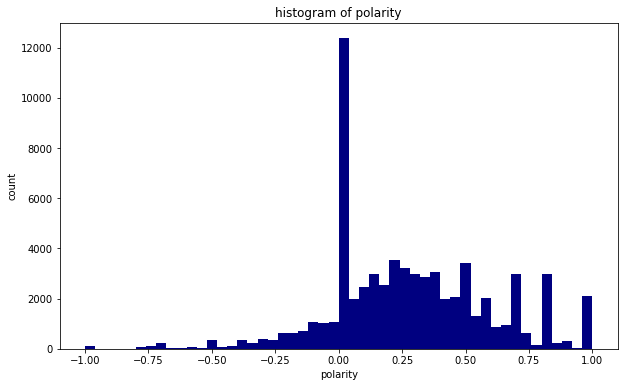

In [44]:
import matplotlib.pyplot as plt

#option 1 count the frequency of polarity.
num_bins=50
plt.figure(figsize=(10,6))
n, bins, patches=plt.hist(sa_reviews.polarity, num_bins, facecolor='navy')
plt.xlabel('polarity')
plt.ylabel('count')
plt.title('histogram of polarity')
plt.show()

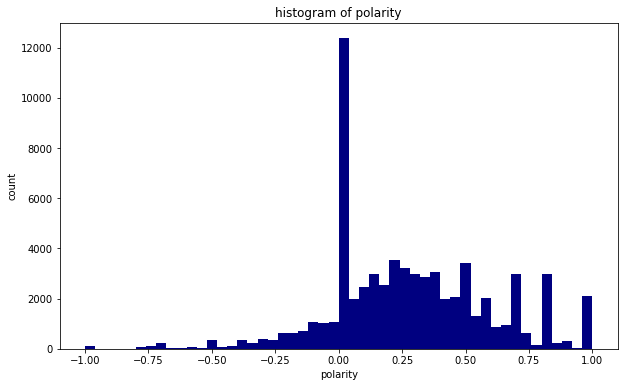

In [45]:
#option 2 count the frequency of polarity.
num_bins=50
plt.figure(figsize=(10,6))
n, bins, patches=plt.hist(cell_sa_reviews.polarity, num_bins, facecolor='navy')
plt.xlabel('polarity')
plt.ylabel('count')
plt.title('histogram of polarity')
plt.show()

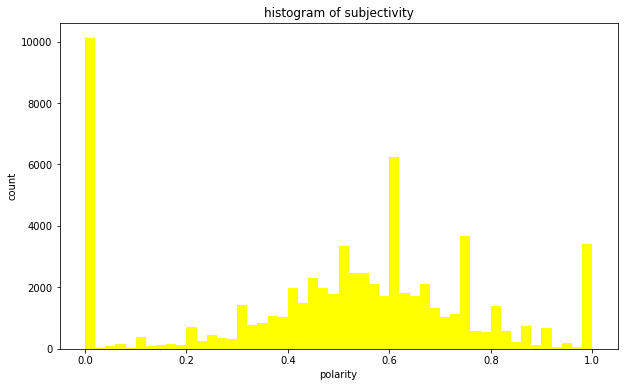

In [46]:
#option 1
num_bins=50
plt.figure(figsize=(10,6))
n, bins, patches=plt.hist(sa_reviews.subjectivity, num_bins, facecolor='yellow')
plt.xlabel('polarity')
plt.ylabel('count')
plt.title('histogram of subjectivity')
plt.show()

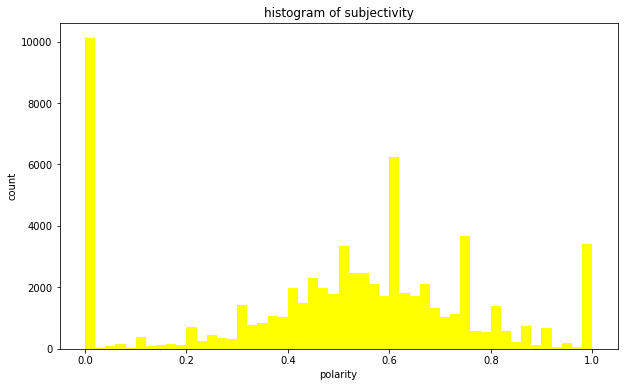

In [47]:
#option 2
num_bins=50
plt.figure(figsize=(10,6))
n, bins, patches=plt.hist(cell_sa_reviews.subjectivity, num_bins, facecolor='yellow')
plt.xlabel('polarity')
plt.ylabel('count')
plt.title('histogram of subjectivity')
plt.show()

### Sentiment Analysis: Vader (Unsupervised) 

In [100]:
!pip install vaderSentiment

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

     |████████████████████████████████| 125 kB 4.9 MB/s 


In [101]:
# Initiaing the vader sentiment object.
analyzer = SentimentIntensityAnalyzer()

# Building a small defined function to generate vader sentiment outputs.

def vader_score(text):
  return analyzer.polarity_scores(text)

In [102]:
# With the help of defined function, we estimate Vader Scores.
print("Option 1: ")
saavy=sa_reviews[['title','body','label_num']]
saavy['vader_score']=saavy['body'].apply(vader_score)
saavy.head()

Option 1: 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,title,body,label_num,vader_score
0,stupid phone,buy service,1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
1,exellent service,nextel nearly year started time last year moto...,4,"{'neg': 0.069, 'neu': 0.611, 'pos': 0.321, 'co..."
2,love,got say easy use hear person talking fine prob...,5,"{'neg': 0.175, 'neu': 0.519, 'pos': 0.305, 'co..."
3,phones locked,star phones locked pay additional fees unlock,1,"{'neg': 0.189, 'neu': 0.811, 'pos': 0.0, 'comp..."
4,excellent product,product good used cell phone one projects work...,5,"{'neg': 0.0, 'neu': 0.481, 'pos': 0.519, 'comp..."


In [103]:
print("Option 2: ")
cell_saavy=cell_sa_reviews[['title','body','label_num']]
cell_saavy['vader_score']=cell_saavy['body'].apply(vader_score)
cell_saavy.head()

Option 2: 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,title,body,label_num,vader_score
0,stupid phone,buy service,1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
1,exellent service,nextel nearly year started time last year moto...,4,"{'neg': 0.069, 'neu': 0.611, 'pos': 0.321, 'co..."
2,love,got say easy use hear person talking fine prob...,5,"{'neg': 0.175, 'neu': 0.519, 'pos': 0.305, 'co..."
3,phones locked,star phones locked pay additional fees unlock,1,"{'neg': 0.189, 'neu': 0.811, 'pos': 0.0, 'comp..."
4,excellent product,product good used cell phone one projects work...,5,"{'neg': 0.0, 'neu': 0.481, 'pos': 0.519, 'comp..."


In [104]:
#option 1 estimating the vader_compound, vader_negative, vader_neutral and vader_positive for my dataset.
saavy['vader_compound']=saavy['vader_score'].apply(lambda score_dict: score_dict['compound'])
saavy['vader_negative']=saavy['vader_score'].apply(lambda score_dict: score_dict['neg'])
saavy['vader_neutral']=saavy['vader_score'].apply(lambda score_dict: score_dict['neu'])
saavy['vader_positive']=saavy['vader_score'].apply(lambda score_dict: score_dict['pos'])
saavy.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

,title,body,label_num,vader_score,vader_compound,vader_negative,vader_neutral,vader_positive
0,stupid phone,buy service,1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,1.000,0.000
1,exellent service,nextel nearly year started time last year moto...,4,"{'neg': 0.069, 'neu': 0.611, 'pos': 0.321, 'co...",0.8979,0.069,0.611,0.321
2,love,got say easy use hear person talking fine prob...,5,"{'neg': 0.175, 'neu': 0.519, 'pos': 0.305, 'co...",0.2500,0.175,0.519,0.305
3,phones locked,star phones locked pay additional fees unlock,1,"{'neg': 0.189, 'neu': 0.811, 'pos': 0.0, 'comp...",-0.1027,0.189,0.811,0.000
4,excellent product,product good used cell phone one projects work...,5,"{'neg': 0.0, 'neu': 0.481, 'pos': 0.519, 'comp...",0.8689,0.000,0.481,0.519


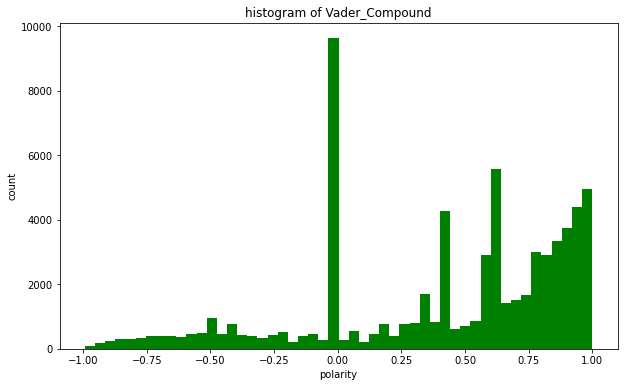

In [105]:
#histogram of Vader_Compound.
#option 1
num_bins=50
plt.figure(figsize=(10,6))
n, bins, patches=plt.hist(saavy.vader_compound, num_bins, facecolor='green')
plt.xlabel('polarity')
plt.ylabel('count')
plt.title('histogram of Vader_Compound')
plt.show()

In [106]:
#option 2 estimating the vader_compound, vader_negative, vader_neutral and vader_positive for dataset.
cell_saavy['vader_compound']=cell_saavy['vader_score'].apply(lambda score_dict: score_dict['compound'])
cell_saavy['vader_negative']=cell_saavy['vader_score'].apply(lambda score_dict: score_dict['neg'])
cell_saavy['vader_neutral']=cell_saavy['vader_score'].apply(lambda score_dict: score_dict['neu'])
cell_saavy['vader_positive']=cell_saavy['vader_score'].apply(lambda score_dict: score_dict['pos'])
cell_saavy.head()

,title,body,label_num,vader_score,vader_compound,vader_negative,vader_neutral,vader_positive
0,stupid phone,buy service,1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,1.000,0.000
1,exellent service,nextel nearly year started time last year moto...,4,"{'neg': 0.069, 'neu': 0.611, 'pos': 0.321, 'co...",0.8979,0.069,0.611,0.321
2,love,got say easy use hear person talking fine prob...,5,"{'neg': 0.175, 'neu': 0.519, 'pos': 0.305, 'co...",0.2500,0.175,0.519,0.305
3,phones locked,star phones locked pay additional fees unlock,1,"{'neg': 0.189, 'neu': 0.811, 'pos': 0.0, 'comp...",-0.1027,0.189,0.811,0.000
4,excellent product,product good used cell phone one projects work...,5,"{'neg': 0.0, 'neu': 0.481, 'pos': 0.519, 'comp...",0.8689,0.000,0.481,0.519


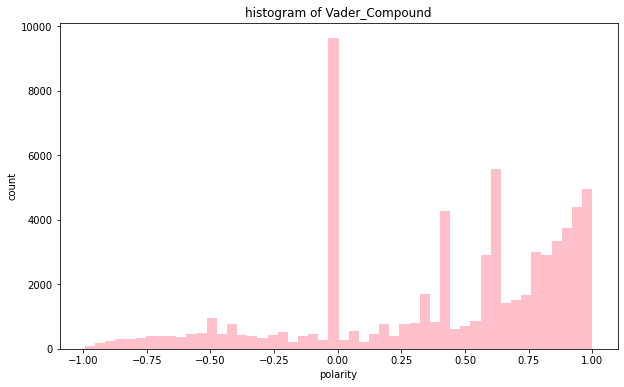

In [107]:
#histogram of Vader_Compound.
#option 2
num_bins=50
plt.figure(figsize=(10,6))
n, bins, patches=plt.hist(cell_saavy.vader_compound, num_bins, facecolor='pink')
plt.xlabel('polarity')
plt.ylabel('count')
plt.title('histogram of Vader_Compound')
plt.show()

# **Sentiment Analysis - Supervised Learning Method**

Here, we are running the Sentiment Analysis based on the supervised Learning models. We will start with few necessary pre preprocessing. Later on, we will run the Naive-Bayes model and Logistic Regression model to compare the accuracy values of the model and determine which model is better in terms of estimating the sentiment analysis based on supervised learning.


In [48]:
sa_reviews_nb = sa_reviews.drop(columns=['label_num', 'body_string', 'polarity', 'subjectivity'])
sa_reviews_nb

,title,body,sentiment,new_label_num
0,stupid phone,buy service,Not Recommended,0
1,exellent service,nextel nearly year started time last year moto...,Recommended,0
2,love,got say easy use hear person talking fine prob...,Recommended,0
3,phones locked,star phones locked pay additional fees unlock,Not Recommended,0
4,excellent product,product good used cell phone one projects work...,Recommended,0
...,...,...,...,...
67751,awesome phone finger scanner big miss,love camera phone screen huge colors vibrant p...,Recommended,0
67752,simply amazing,xperia user several years say sony come long w...,Recommended,0
67753,great phon many bugs need fix still waiting up...,buy one cousin,Recommended,0
67754,phone like new,product looks works like new much recommend,Recommended,0


In [49]:
sa_reviews_nb['new_label_num'] = sa_reviews_nb.sentiment.map({'Not Recommended':0, 'Recommended':1})

In [50]:
# Spliting the dataset into Training and Testing

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(sa_reviews_nb['body'], 
                                                    sa_reviews_nb['new_label_num'],
                                                    random_state=0, 
                                                    test_size=0.25 # Assigned 25% data to a test set.
                                                    )

print('Number of rows in the total set: {}'.format(sa_reviews_nb.shape[0]))
print('Number of rows in the training set: {}'.format(X_train.shape[0]))
print('Number of rows in the test set: {}'.format(X_test.shape[0]))


Number of rows in the total set: 67756
Number of rows in the training set: 50817
Number of rows in the test set: 16939


In [51]:
# Now, as part of necessary preprocessing, we are generating TF-IDF vectorizer.

from sklearn.feature_extraction.text import TfidfVectorizer

# Generating CountVectorizer object.

tfidf_vector = TfidfVectorizer(
lowercase=True,                    
stop_words='english',
ngram_range=(1, 2),             # The lower and upper boundary of the range of n-values for different n-grams to be extracted.
max_df=0.3,                     # Used this for removing terms that appear too frequently
min_df=0.05                     # Used this for removing terms that appear too infrequently.  
)



# Fitting the training data and then return the matrix

training_data = tfidf_vector.fit_transform(X_train)

# Transforming testing data and return the matrix. Note we are not fitting the testing data into the CountVectorizer()

testing_data = tfidf_vector.transform(X_test)


print ("Shape of training set",training_data.shape)

print ("Shape of testing set",testing_data.shape)

Shape of training set (50817, 37)
Shape of testing set (16939, 37)


### Sentiment Analysis: Naive Bayes (Supervised) 

In [52]:
from sklearn.naive_bayes import MultinomialNB

naive_bayes = MultinomialNB()

# Fitting our training dataset to the model.

naive_bayes.fit(training_data, y_train)

# Predicting the labels for testing set.

predicted = naive_bayes.predict(testing_data)

In [53]:
# Loading few libraries

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


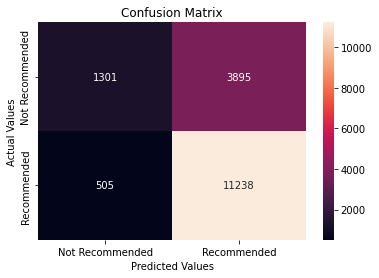

In [54]:
# Creating a confusion matrix which compares the y_test and y_pred.

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, predicted)
cm_df = pd.DataFrame(cm,index = ['Not Recommended','Recommended'],
                     columns = ['Not Recommended','Recommended']  
                     )

# Plotting the confusion matrix

plt.figure(figsize=(6,4))
sns.heatmap(cm_df, annot=True , fmt=".0f")
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

### Sentiment Analysis: Logistic Regression (Supervised) 

In [55]:
from sklearn.linear_model import LogisticRegression
!pip install dmba
from dmba import classificationSummary

     |████████████████████████████████| 11.8 MB 4.6 MB/s 
no display found. Using non-interactive Agg backend


In [56]:
# Now fitting the models and predictng the values.

logit = LogisticRegression(solver = 'liblinear')
logit.fit(training_data, y_train)

preds_train = logit.predict(training_data)
logit_preds_valid = logit.predict(testing_data)

In [57]:
# Here, we are estimating the Accuracy, Precision, Recall and F1 Scores for both Naive Bayes & Logistic Regression and summarizing the results in a dataframe. 


data_df = [[accuracy_score(y_test, predicted), precision_score(y_test, predicted), recall_score(y_test, predicted), f1_score(y_test, predicted)],
           [accuracy_score(y_test, logit_preds_valid), precision_score(y_test, logit_preds_valid),recall_score(y_test, logit_preds_valid),f1_score(y_test, logit_preds_valid)]]
           
comparison_df = pd.DataFrame(data_df, columns = ['Accuracy', 'Precision', 'Recall', 'F1 Score'], index = ['Naive Bayes', 'Logistic Regression'])

comparison_df


,Accuracy,Precision,Recall,F1 Score
Naive Bayes,0.740244,0.742615,0.956996,0.836285
Logistic Regression,0.753527,0.775080,0.907945,0.836268


# **Topic Generation**

### Gensim on all years

In [81]:
phone_reviews['clean_review_body'] = phone_reviews['review_body'].map(preprocess)
phone_reviews.head()

,asin,review_rating,date,verified,review_title,review_body,brand,phone_brand_model,average_product_review,price,clean_review_title,clean_review_body,sentiment
0,B0009N5L7K,1,2016-03-05,True,Stupid phone,DON'T BUY OUT OF SERVICE,Motorola,Motorola I265 phone,3.0,49.95,stupid phone,[service],0
1,B0009N5L7K,4,2006-02-09,False,Exellent Service,I have been with nextel for nearly a year now ...,Motorola,Motorola I265 phone,3.0,49.95,exellent service,"[nextel, nearly, year, start, time, year, moto...",0
2,B0009N5L7K,5,2006-02-07,False,I love it,"I just got it and have to say its easy to use,...",Motorola,Motorola I265 phone,3.0,49.95,love,"[easy, hear, person, talk, fine, problems, dea...",0
3,B0009N5L7K,1,2016-12-20,True,Phones locked,1 star because the phones locked so I have to ...,Motorola,Motorola I265 phone,3.0,49.95,phones locked,"[star, phone, lock, additional, fee, unlock]",0
4,B0009N5L7K,5,2009-12-13,True,Excellent product,The product has been very good. I had used thi...,Motorola,Motorola I265 phone,3.0,49.95,excellent product,"[product, good, cell, phone, project, work, wo...",0


In [82]:
#mapping between words and the corresponding integers.
dictionary = gensim.corpora.Dictionary(phone_reviews['clean_review_body'])
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 20:
        break
print (len(phone_reviews))
print (len(dictionary))

0 service
1 best
2 call
3 cell
4 company
5 consider
6 make
7 motorola
8 nearly
9 nextel
10 opinion
11 phone
12 problems
13 reciving
14 shoot
15 start
16 time
17 upgrade
18 year
19 deal
20 easy
67756
24995


In [83]:
#Gensim doc2bow (pass the tokenized words to doc2bow and convert those to vectors.)
#For each document, check how many words and how many times those words appear.
bow_corpus = [dictionary.doc2bow(doc) for doc in phone_reviews['clean_review_body']]
print (len(bow_corpus))
print (bow_corpus[0])
#pretiffy the above result.
bow_doc_0 = bow_corpus[0]
for i in range(len(bow_doc_0)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_0[i][0], 
                                               dictionary[bow_doc_0[i][0]],bow_doc_0[i][1]))

67756
[(0, 1)]
Word 0 ("service") appears 1 time.


In [84]:
#Gensim doc2bow (pass the tokenized words to doc2bow and convert those to vectors.)
#For each document, check how many words and how many times those words appear.
print (bow_corpus[1])
#pretiffy the above result.
bow_doc_1 = bow_corpus[1]
for i in range(len(bow_doc_1)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_1[i][0], 
                                               dictionary[bow_doc_1[i][0]],bow_doc_1[i][1]))

[(0, 1), (1, 3), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 2), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 2)]
Word 0 ("service") appears 1 time.
Word 1 ("best") appears 3 time.
Word 2 ("call") appears 1 time.
Word 3 ("cell") appears 1 time.
Word 4 ("company") appears 1 time.
Word 5 ("consider") appears 1 time.
Word 6 ("make") appears 1 time.
Word 7 ("motorola") appears 1 time.
Word 8 ("nearly") appears 1 time.
Word 9 ("nextel") appears 2 time.
Word 10 ("opinion") appears 1 time.
Word 11 ("phone") appears 1 time.
Word 12 ("problems") appears 1 time.
Word 13 ("reciving") appears 1 time.
Word 14 ("shoot") appears 1 time.
Word 15 ("start") appears 1 time.
Word 16 ("time") appears 1 time.
Word 17 ("upgrade") appears 1 time.
Word 18 ("year") appears 2 time.


In [85]:
#create tf-idf model.
from gensim import corpora, models
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]
from pprint import pprint
for doc in corpus_tfidf[:2]:
    print(doc)
    break

[(0, 1.0)]


In [86]:
from gensim.models import CoherenceModel
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=5, id2word=dictionary)

In [87]:
for idx, topic in lda_model_tfidf.print_topics(-1, num_words=10):
    #print out topic numbers and keywords.
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.018*"buen" + 0.016*"excellent" + 0.013*"teléfono" + 0.011*"precio" + 0.011*"awesome" + 0.009*"producto" + 0.009*"calidad" + 0.009*"celular" + 0.007*"buena" + 0.007*"para"
Topic: 1 Word: 0.034*"good" + 0.016*"great" + 0.014*"price" + 0.013*"phone" + 0.013*"nice" + 0.013*"battery" + 0.011*"excelente" + 0.009*"camera" + 0.009*"like" + 0.009*"life"
Topic: 2 Word: 0.013*"work" + 0.011*"phone" + 0.010*"unlock" + 0.008*"return" + 0.008*"verizon" + 0.007*"come" + 0.007*"card" + 0.006*"receive" + 0.006*"mobile" + 0.006*"charger"
Topic: 3 Word: 0.020*"love" + 0.012*"best" + 0.010*"phone" + 0.008*"screen" + 0.007*"camera" + 0.006*"perfect" + 0.005*"fingerprint" + 0.005*"samsung" + 0.005*"xiaomi" + 0.004*"android"
Topic: 4 Word: 0.044*"great" + 0.023*"work" + 0.020*"product" + 0.019*"love" + 0.019*"phone" + 0.015*"price" + 0.015*"like" + 0.014*"amaze" + 0.014*"good" + 0.013*"happy"


In [88]:
import matplotlib.pyplot as plt

def compute_coherence_values(dictionary, corpus, texts, limit, start=1, step=2):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model =  gensim.models.LdaMulticore(corpus_tfidf, num_topics=num_topics, id2word=dictionary, eta='auto', iterations=100,
                                             random_state=100, alpha='symmetric', passes=2, workers=4)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=phone_reviews['clean_review_body'], dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus_tfidf, texts=phone_reviews['clean_review_body'], start=1, limit=8, step=2)


Num Topics = 1  has Coherence Value of 0.3693
Num Topics = 3  has Coherence Value of 0.3849
Num Topics = 5  has Coherence Value of 0.4676
Num Topics = 7  has Coherence Value of 0.4227


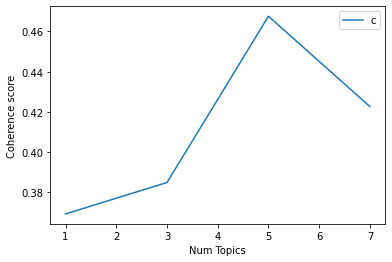

In [89]:
# Show graph
limit=8; start=1; step=2;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))


In [90]:
#Find the dominant topic in each document=====================================================================================================
list_in_list=[]

doc_topics = lda_model_tfidf.get_document_topics(corpus_tfidf)
print('document topics: ', doc_topics)

for each_doc in doc_topics:
    top_topic=sorted(each_doc, key=lambda x: x[1], reverse=True)[0]

    top_topic_num=top_topic[0]
    top_topic_prob=top_topic[1]
     
    list=[top_topic_num,top_topic_prob]
    list_in_list.extend([list])

#create pandas dataframe with column names.
df = pd.DataFrame(list_in_list, columns = ['Dominant Topic', 'Probability']) 
pd.set_option("display.max_rows", None, "display.max_columns", None)

count=df['Dominant Topic'].value_counts()
print(count)

document topics:  <gensim.interfaces.TransformedCorpus object at 0x7f1d02541ed0>
2    20070
3    14777
1    14454
4    13395
0     5060
Name: Dominant Topic, dtype: int64


###Gensim with year=2019 only

In [91]:
phone_reviews_2019 = phone_reviews[(phone_reviews['date'].dt.strftime('%Y') == '2019')]


In [92]:
#mapping between words and the corresponding integers.
dictionary = gensim.corpora.Dictionary(phone_reviews_2019['clean_review_body'])
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 20:
        break
print (len(phone_reviews))
print (len(dictionary))

0 card
1 charger
2 come
3 phone
4 sims
5 accoustics
6 audiophile
7 backup
8 battery
9 bring
10 compare
11 compliment
12 droid
13 flip
14 hour
15 impress
16 infinity
17 international
18 kappa
19 life
20 long
67756
15321


In [93]:
#Gensim doc2bow (pass the tokenized words to doc2bow and convert those to vectors.)
#For each document, check how many words and how many times those words appear.
phone19_bow_corpus = [dictionary.doc2bow(doc) for doc in phone_reviews_2019['clean_review_body']]
print (len(phone19_bow_corpus))
print (phone19_bow_corpus[0])
#pretiffy the above result.
phone19_bow_doc_0 = phone19_bow_corpus[0]
for i in range(len(phone19_bow_doc_0)):
    print("Word {} (\"{}\") appears {} time.".format(phone19_bow_doc_0[i][0], 
                                               dictionary[phone19_bow_doc_0[i][0]],phone19_bow_doc_0[i][1]))

29587
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1)]
Word 0 ("card") appears 1 time.
Word 1 ("charger") appears 1 time.
Word 2 ("come") appears 1 time.
Word 3 ("phone") appears 1 time.
Word 4 ("sims") appears 1 time.


In [94]:
#create tf-idf model.
from gensim import corpora, models
phone19_tfidf = models.TfidfModel(phone19_bow_corpus)
phone19_corpus_tfidf = tfidf[phone19_bow_corpus]
from pprint import pprint
for doc in phone19_corpus_tfidf[:1]:
    print(doc)
    break

[(0, 0.4223842015583013), (1, 0.3721169594583499), (2, 0.3880707909819372), (3, 0.49077184115432765), (4, 0.5400598261989816)]


In [95]:
from gensim.models import CoherenceModel
lda_model_tfidf = gensim.models.LdaMulticore(phone19_corpus_tfidf, num_topics=3, id2word=dictionary)


In [96]:
for idx, topic in lda_model_tfidf.print_topics(-1, num_words=10):
    #print out topic numbers and keywords.
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.049*"phone" + 0.023*"like" + 0.016*"price" + 0.013*"screen" + 0.012*"work" + 0.011*"battery" + 0.009*"great" + 0.009*"time" + 0.008*"good" + 0.008*"camera"
Topic: 1 Word: 0.061*"great" + 0.059*"love" + 0.056*"phone" + 0.017*"perfect" + 0.017*"awesome" + 0.017*"price" + 0.015*"work" + 0.011*"precio" + 0.011*"bueno" + 0.010*"amaze"
Topic: 2 Word: 0.042*"good" + 0.025*"excelente" + 0.021*"excellent" + 0.012*"phone" + 0.009*"time" + 0.009*"buen" + 0.008*"todo" + 0.007*"expect" + 0.007*"samsung" + 0.007*"celular"


In [97]:
import matplotlib.pyplot as plt

def compute_coherence_values(dictionary, corpus, texts, limit, start=1, step=1):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model =  gensim.models.LdaMulticore(phone19_corpus_tfidf, num_topics=num_topics, id2word=dictionary, eta='auto', iterations=100,
                                             random_state=100, alpha='symmetric', passes=2, workers=4)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=phone_reviews_2019['clean_review_body'], dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=phone19_corpus_tfidf, texts=phone_reviews_2019['clean_review_body'], start=1, limit=5, step=1)


Num Topics = 1  has Coherence Value of 0.4191
Num Topics = 2  has Coherence Value of 0.471
Num Topics = 3  has Coherence Value of 0.4648
Num Topics = 4  has Coherence Value of 0.4116


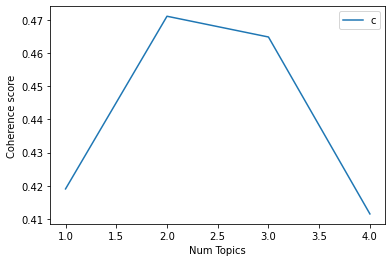

In [98]:
# Show graph
limit=5; start=1; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))


In [99]:
#Find the dominant topic in each document=====================================================================================================
list_in_list=[]

#for the first 4 documents.
doc_topics = lda_model_tfidf.get_document_topics(phone19_corpus_tfidf)
print('document topics: ', doc_topics)

for each_doc in doc_topics:
    top_topic=sorted(each_doc, key=lambda x: x[1], reverse=True)[0]
    top_topic_num=top_topic[0]
    top_topic_prob=top_topic[1]
      
    list=[top_topic_num,top_topic_prob]
    list_in_list.extend([list])

#create pandas dataframe with column names.
df = pd.DataFrame(list_in_list, columns = ['Dominant Topic', 'Probability']) 
pd.set_option("display.max_rows", None, "display.max_columns", None)

count=df['Dominant Topic'].value_counts()
print(count)

document topics:  <gensim.interfaces.TransformedCorpus object at 0x7f1cfedf4510>
0    21155
1     4406
2     4026
Name: Dominant Topic, dtype: int64


# **Random Forest**

In [58]:
sa_reviews.head()

,title,body,label_num,sentiment,new_label_num,body_string,polarity,subjectivity
0,stupid phone,buy service,1,Not Recommended,0,b u y s e r v i c e,0.000000,0.000000
1,exellent service,nextel nearly year started time last year moto...,4,Recommended,0,n e x t e l n e a r l y y e a r s t a r ...,0.620000,0.273333
2,love,got say easy use hear person talking fine prob...,5,Recommended,0,g o t s a y e a s y u s e h e a r p ...,0.425000,0.666667
3,phones locked,star phones locked pay additional fees unlock,1,Not Recommended,0,s t a r p h o n e s l o c k e d p a y ...,0.000000,0.000000
4,excellent product,product good used cell phone one projects work...,5,Recommended,0,p r o d u c t g o o d u s e d c e l l ...,0.316667,0.533333


In [59]:
sa_reviews.tail()

,title,body,label_num,sentiment,new_label_num,body_string,polarity,subjectivity
67751,awesome phone finger scanner big miss,love camera phone screen huge colors vibrant p...,5,Recommended,0,l o v e c a m e r a p h o n e s c r e e ...,0.198413,0.470635
67752,simply amazing,xperia user several years say sony come long w...,5,Recommended,0,x p e r i a u s e r s e v e r a l y e a ...,0.043750,0.462500
67753,great phon many bugs need fix still waiting up...,buy one cousin,5,Recommended,0,b u y o n e c o u s i n,0.000000,0.000000
67754,phone like new,product looks works like new much recommend,5,Recommended,0,p r o d u c t l o o k s w o r k s l i k ...,0.168182,0.327273
67755,outstanding phone price,love size style phone great size phone many gr...,5,Recommended,0,l o v e s i z e s t y l e p h o n e g ...,0.660000,0.640000


In [60]:
sa_reviews['sentiment'] = sa_reviews.label_num.map({1:'Positive',2:'Negative', 3:'Neutral', 4:'Positive', 5:'Positive'})
print("Shape:", sa_reviews.shape)
print('Column names', sa_reviews.columns.values)
#sa_reviews.iloc[:10,:]

Shape: (67756, 8)
Column names ['title' 'body' 'label_num' 'sentiment' 'new_label_num' 'body_string'
 'polarity' 'subjectivity']


In [61]:
sa_reviews.sentiment.values

array(['Positive', 'Positive', 'Positive', ..., 'Positive', 'Positive',
       'Positive'], dtype=object)

In [62]:
from sklearn.ensemble import RandomForestClassifier

In [63]:
sa_reviews['new_label_num'] = sa_reviews.sentiment.map({'Positive':0, 'Negative':1, 'Neutral':2})

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(sa_reviews['body'], 
                                                    sa_reviews['new_label_num'],
                                                    random_state=0, 
                                                    test_size=0.25 # Assigned 25% data to a test set.
                                                    )


In [65]:
model = RandomForestClassifier(n_estimators=200)
model.fit(training_data,y_train)
predictions = model.predict(testing_data)


In [66]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy score is ', format(accuracy_score(y_test, predictions)))
print('Precision score is ', format(precision_score(y_test, predictions,average='micro')))
print('Recall score is ', format(recall_score(y_test, predictions,average='micro')))
print('F1 score is ', format(f1_score(y_test, predictions,average='micro')))

Accuracy score is  0.8731330066709959
Precision score is  0.8731330066709959
Recall score is  0.8731330066709959
F1 score is  0.8731330066709959


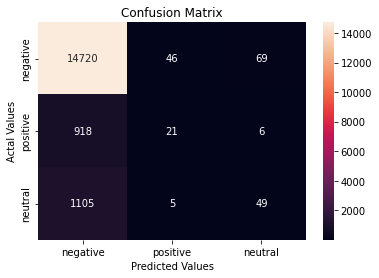

In [67]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
cm_rr = confusion_matrix(y_test, predictions)
cm_df_rr = pd.DataFrame(cm_rr,index = ['negative','positive','neutral'],
                     columns = ['negative','positive','neutral']  
                     )

# Plotting the confusion matrix

plt.figure(figsize=(6,4))
sns.heatmap(cm_df_rr, annot=True , fmt=".0f")
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

# **Regression**

In [68]:
phone_reviews['sentiment'] = sa_reviews['new_label_num']
phone_reviews

,asin,review_rating,date,verified,review_title,review_body,brand,phone_brand_model,average_product_review,price,clean_review_title,clean_review_body,sentiment
0,B0009N5L7K,1,2016-03-05,True,Stupid phone,DON'T BUY OUT OF SERVICE,Motorola,Motorola I265 phone,3.0,49.95,stupid phone,buy service,0
1,B0009N5L7K,4,2006-02-09,False,Exellent Service,I have been with nextel for nearly a year now ...,Motorola,Motorola I265 phone,3.0,49.95,exellent service,nextel nearly year started time last year moto...,0
2,B0009N5L7K,5,2006-02-07,False,I love it,"I just got it and have to say its easy to use,...",Motorola,Motorola I265 phone,3.0,49.95,love,got say easy use hear person talking fine prob...,0
3,B0009N5L7K,1,2016-12-20,True,Phones locked,1 star because the phones locked so I have to ...,Motorola,Motorola I265 phone,3.0,49.95,phones locked,star phones locked pay additional fees unlock,0
4,B0009N5L7K,5,2009-12-13,True,Excellent product,The product has been very good. I had used thi...,Motorola,Motorola I265 phone,3.0,49.95,excellent product,product good used cell phone one projects work...,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
67751,B081H6STQQ,5,2019-08-16,False,"Awesome Phone, but finger scanner is a big mis...",I love the camera on this phone. The screen is...,Sony,Sony Xperia 1 Unlocked Smartphone and WH1000XM...,4.5,948.00,awesome phone finger scanner big miss,love camera phone screen huge colors vibrant p...,0
67752,B081H6STQQ,5,2019-09-14,False,Simply Amazing!,I've been an Xperia user for several years and...,Sony,Sony Xperia 1 Unlocked Smartphone and WH1000XM...,4.5,948.00,simply amazing,xperia user several years say sony come long w...,0
67753,B081H6STQQ,5,2019-07-14,False,"great phon3, but many bugs need to fix. still ...",buy one more for my cousin,Sony,Sony Xperia 1 Unlocked Smartphone and WH1000XM...,4.5,948.00,great phon many bugs need fix still waiting up...,buy one cousin,0
67754,B081TJFVCJ,5,2019-12-24,True,Phone is like new,Product looks and works like new. Very much re...,Apple,"Apple iPhone X, 64GB, Gray - Fully Unlocked (R...",5.0,478.97,phone like new,product looks works like new much recommend,0


In [69]:
import matplotlib.pyplot as plot


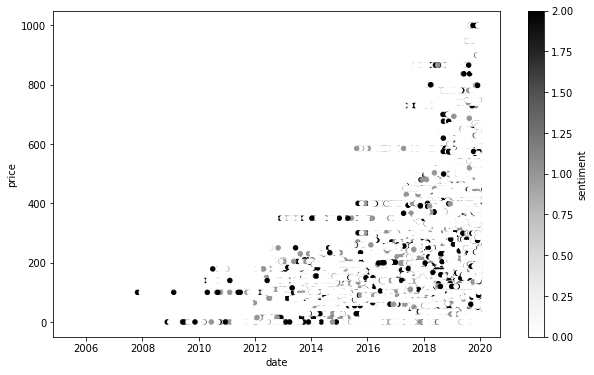

In [70]:
fig, ax = plt.subplots(figsize = (10, 6))
phone_reviews.plot(kind='scatter', x ='date', y = 'price', c= 'sentiment', ax = ax)
#plot.title('Price of phones')
#plt.xlabel('Price')
#plt.ylabel('count')
#plot.show()

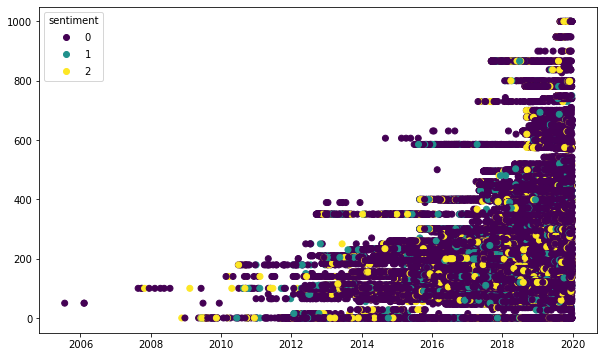

In [71]:
fig, ax = plt.subplots(figsize = (10, 6))

# Plot the data
scatter = ax.scatter(phone_reviews["date"], 
                     phone_reviews["price"], 
                     c=phone_reviews["sentiment"])
ax.legend(*scatter.legend_elements(), title="sentiment")

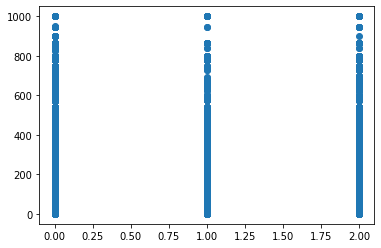

In [72]:
plt.scatter(phone_reviews.sentiment, phone_reviews.price)

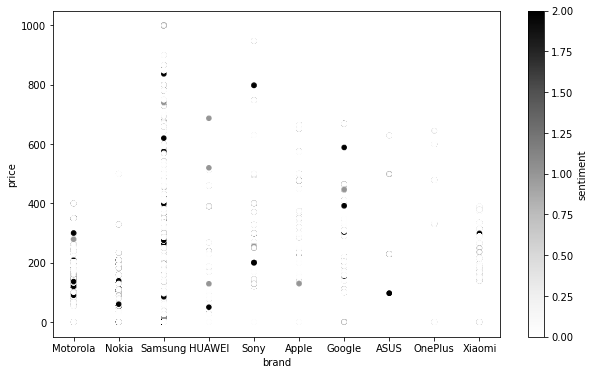

In [73]:
fig, ax = plt.subplots(figsize = (10, 6))
phone_reviews.plot(kind='scatter', x ='brand', y = 'price', c= 'sentiment', ax = ax)

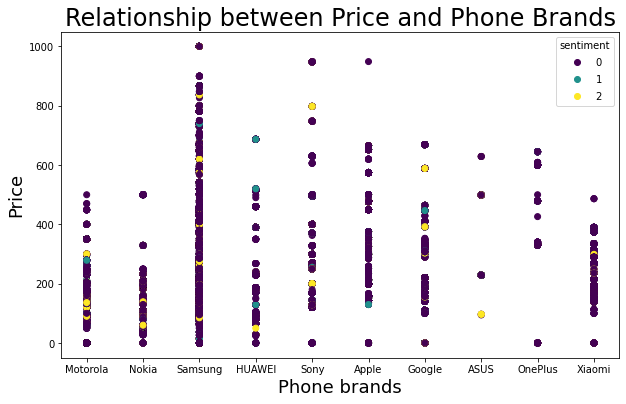

In [74]:
fig, ax = plt.subplots(figsize = (10, 6))

# Plot the data
scatter = ax.scatter(phone_reviews["brand"], 
                     phone_reviews["price"], 
                     c=phone_reviews["sentiment"])
ax.legend(*scatter.legend_elements(), title="sentiment")
plt.title('Relationship between Price and Phone Brands', size=24)
plt.xlabel('Phone brands', size=18)
plt.ylabel('Price', size=18);

Checking for linearity between different brands of phone

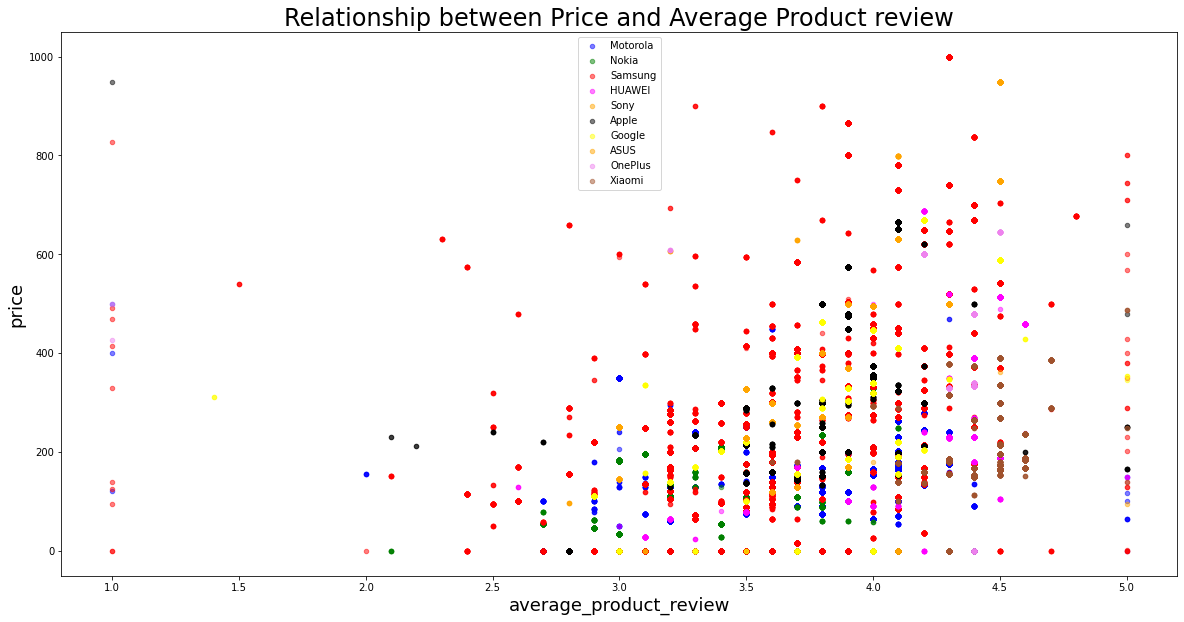

In [75]:
ax1 = phone_reviews[phone_reviews['brand'] == 'Motorola'].plot(kind='scatter', x='average_product_review', y='price', color='blue', alpha=0.5, figsize=(20, 10))
phone_reviews[phone_reviews['brand'] == 'Nokia'].plot(kind='scatter', x='average_product_review', y='price', color='green', alpha=0.5, figsize=(20, 10), ax=ax1)
phone_reviews[phone_reviews['brand'] == 'Samsung'].plot(kind='scatter', x='average_product_review', y='price', color='red', alpha=0.5, figsize=(20,10), ax=ax1)
phone_reviews[phone_reviews['brand'] == 'HUAWEI'].plot(kind='scatter', x='average_product_review', y='price', color='magenta', alpha=0.5, figsize=(20 ,10), ax=ax1)
phone_reviews[phone_reviews['brand'] == 'Sony'].plot(kind='scatter', x='average_product_review', y='price', color='orange', alpha=0.5, figsize=(20 ,10), ax=ax1)
phone_reviews[phone_reviews['brand'] == 'Apple'].plot(kind='scatter', x='average_product_review', y='price', color='black', alpha=0.5, figsize=(20 ,10), ax=ax1)
phone_reviews[phone_reviews['brand'] == 'Google'].plot(kind='scatter', x='average_product_review', y='price', color='yellow', alpha=0.5, figsize=(20 ,10), ax=ax1)
phone_reviews[phone_reviews['brand'] == 'ASUS'].plot(kind='scatter', x='average_product_review', y='price', color='orange', alpha=0.5, figsize=(20 ,10), ax=ax1)
phone_reviews[phone_reviews['brand'] == 'OnePlus'].plot(kind='scatter', x='average_product_review', y='price', color='violet', alpha=0.5, figsize=(20 ,10), ax=ax1)
phone_reviews[phone_reviews['brand'] == 'Xiaomi'].plot(kind='scatter', x='average_product_review', y='price', color='sienna', alpha=0.5, figsize=(20 ,10), ax=ax1)
plt.legend(labels=['Motorola', 'Nokia', 'Samsung','HUAWEI','Sony','Apple', 'Google','ASUS','OnePlus','Xiaomi'])
plt.title('Relationship between Price and Average Product review', size=24)
plt.xlabel('average_product_review', size=18)
plt.ylabel('price', size=18);

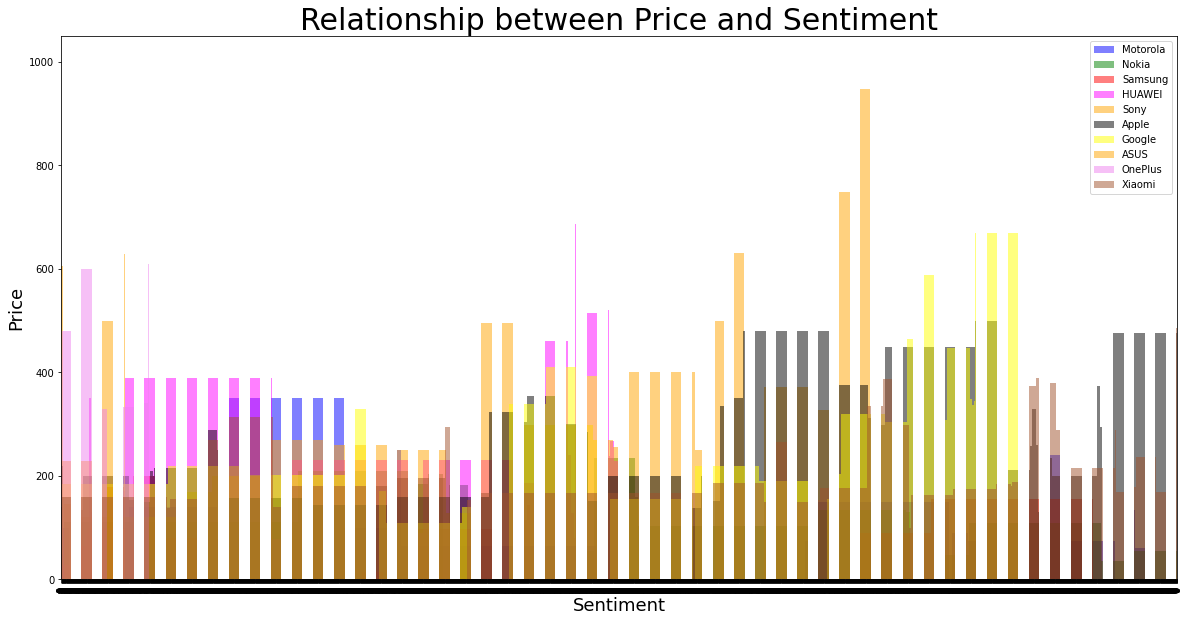

In [76]:
ax1 = phone_reviews[phone_reviews['brand'] == 'Motorola'].plot.bar( x='sentiment', y='price', color='blue', alpha=0.5, figsize=(20, 10))
phone_reviews[phone_reviews['brand'] == 'Nokia'].plot.bar( x='sentiment', y='price', color='green', alpha=0.5, figsize=(20 ,10), ax=ax1)
phone_reviews[phone_reviews['brand'] == 'Samsung'].plot.bar(x='sentiment', y='price', color='red', alpha=0.5, figsize=(20 ,10), ax=ax1)
phone_reviews[phone_reviews['brand'] == 'HUAWEI'].plot.bar(x='sentiment', y='price', color='magenta', alpha=0.5, figsize=(20 ,10), ax=ax1)
phone_reviews[phone_reviews['brand'] == 'Sony'].plot.bar(x='sentiment', y='price', color='orange', alpha=0.5, figsize=(20 ,10), ax=ax1)
phone_reviews[phone_reviews['brand'] == 'Apple'].plot.bar(x='sentiment', y='price', color='black', alpha=0.5, figsize=(20 ,10), ax=ax1)
phone_reviews[phone_reviews['brand'] == 'Google'].plot.bar(x='sentiment', y='price', color='yellow', alpha=0.5, figsize=(20 ,10), ax=ax1)
phone_reviews[phone_reviews['brand'] == 'ASUS'].plot.bar(x='sentiment', y='price', color='orange', alpha=0.5, figsize=(20 ,10), ax=ax1)
phone_reviews[phone_reviews['brand'] == 'OnePlus'].plot.bar(x='sentiment', y='price', color='violet', alpha=0.5, figsize=(20 ,10), ax=ax1)
phone_reviews[phone_reviews['brand'] == 'Xiaomi'].plot.bar(x='sentiment', y='price', color='sienna', alpha=0.5, figsize=(20 ,10), ax=ax1)
plt.legend(labels=['Motorola', 'Nokia', 'Samsung','HUAWEI','Sony','Apple', 'Google','ASUS','OnePlus','Xiaomi' ])
plt.title('Relationship between Price and Sentiment', size=30)
plt.xlabel('Sentiment', size=18)
plt.ylabel('Price', size=18);

In [77]:
import numpy as np
from numpy import cov
from scipy.stats import pearsonr

In [78]:
covariance = cov(phone_reviews['price'], phone_reviews['sentiment'])

In [79]:
print(covariance)

[[ 3.55589621e+04 -3.28574416e+00]
 [-3.28574416e+00  2.98247442e-01]]


In [80]:
corr, _ = pearsonr(phone_reviews['price'], phone_reviews['sentiment'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.032
